In [ ]:
"""
- 순환신경망: simpleRNN, LSTM, GRU
LSTM(3, iuput_dim = 1)  ==  LSTM(출력 갯수, 입력 차원)
Dense(3, input_dum = 1, input_length = 4) 

- LSTM options
input_length = 4 : 시퀀스 데이터의 입력 길이
return_sequences : 시퀀스 출력 여부
True == many to many
False == many to one
stateful(if True, last state의 값이 그 다음 샘플의 초기값으로 쓸거냐)
"""

In [ ]:
# c d e f g a b 
# 4분음표, 8분음표

In [1]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}


In [2]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [3]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [4]:
x_train = dataset[:,0:4]
y_train = dataset[:,4]
max_idx_value = 13

In [34]:
y_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [6]:
x_train

array([[11,  9,  2, 10],
       [ 9,  2, 10,  8],
       [ 2, 10,  8,  1],
       [10,  8,  1,  7],
       [ 8,  1,  7,  8],
       [ 1,  7,  8,  9],
       [ 7,  8,  9, 10],
       [ 8,  9, 10, 11],
       [ 9, 10, 11, 11],
       [10, 11, 11,  4],
       [11, 11,  4, 11],
       [11,  4, 11,  9],
       [ 4, 11,  9,  9],
       [11,  9,  9,  9],
       [ 9,  9,  9, 10],
       [ 9,  9, 10,  8],
       [ 9, 10,  8,  1],
       [10,  8,  1,  7],
       [ 8,  1,  7,  9],
       [ 1,  7,  9, 11],
       [ 7,  9, 11, 11],
       [ 9, 11, 11,  9],
       [11, 11,  9,  9],
       [11,  9,  9,  2],
       [ 9,  9,  2,  8],
       [ 9,  2,  8,  8],
       [ 2,  8,  8,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  9],
       [ 8,  8,  9,  3],
       [ 8,  9,  3,  9],
       [ 9,  3,  9,  9],
       [ 3,  9,  9,  9],
       [ 9,  9,  9,  9],
       [ 9,  9,  9,  9],
       [ 9,  9,  9, 10],
       [ 9,  9, 10,  4],
       [ 9, 10,  4, 11],
       [10,  4, 11,  9],


In [7]:
# x-data -> 정규화
x_train = x_train / float(max_idx_value)

In [9]:
#  y-data -> onehotencoding
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [10]:
y_train = np_utils.to_categorical(y_train)

In [11]:
print(x_train.shape)
print(y_train.shape)

(50, 4)
(50, 12)


In [15]:
one_hot_vec_size = y_train.shape[1] # length 12가 50개 있지.

In [17]:
model = Sequential()

# 다층 퍼셉트론(신경망) 모델
model.add(Dense(128, input_dim = 4, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(one_hot_vec_size, activation = 'softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# 
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [22]:
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [24]:
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

Epoch 1/2000
5/5 - 0s - loss: 2.4089 - accuracy: 0.3000
Epoch 2/2000
5/5 - 0s - loss: 2.2892 - accuracy: 0.3400
Epoch 3/2000
5/5 - 0s - loss: 2.1954 - accuracy: 0.3400
Epoch 4/2000
5/5 - 0s - loss: 2.0993 - accuracy: 0.3400
Epoch 5/2000
5/5 - 0s - loss: 2.0182 - accuracy: 0.3400
Epoch 6/2000
5/5 - 0s - loss: 1.9764 - accuracy: 0.3400
Epoch 7/2000
5/5 - 0s - loss: 1.9231 - accuracy: 0.3400
Epoch 8/2000
5/5 - 0s - loss: 1.8988 - accuracy: 0.3400
Epoch 9/2000
5/5 - 0s - loss: 1.8782 - accuracy: 0.3400
Epoch 10/2000
5/5 - 0s - loss: 1.8658 - accuracy: 0.3400
Epoch 11/2000
5/5 - 0s - loss: 1.8384 - accuracy: 0.3400
Epoch 12/2000
5/5 - 0s - loss: 1.8226 - accuracy: 0.3400
Epoch 13/2000
5/5 - 0s - loss: 1.8090 - accuracy: 0.3400
Epoch 14/2000
5/5 - 0s - loss: 1.7962 - accuracy: 0.3400
Epoch 15/2000
5/5 - 0s - loss: 1.7788 - accuracy: 0.3400
Epoch 16/2000
5/5 - 0s - loss: 1.7632 - accuracy: 0.3400
Epoch 17/2000
5/5 - 0s - loss: 1.7516 - accuracy: 0.3800
Epoch 18/2000
5/5 - 0s - loss: 1.7447 - 

Epoch 145/2000
5/5 - 0s - loss: 1.2469 - accuracy: 0.5200
Epoch 146/2000
5/5 - 0s - loss: 1.2473 - accuracy: 0.5400
Epoch 147/2000
5/5 - 0s - loss: 1.2374 - accuracy: 0.5400
Epoch 148/2000
5/5 - 0s - loss: 1.2376 - accuracy: 0.5400
Epoch 149/2000
5/5 - 0s - loss: 1.2298 - accuracy: 0.5400
Epoch 150/2000
5/5 - 0s - loss: 1.2277 - accuracy: 0.5400
Epoch 151/2000
5/5 - 0s - loss: 1.2265 - accuracy: 0.5600
Epoch 152/2000
5/5 - 0s - loss: 1.2260 - accuracy: 0.5400
Epoch 153/2000
5/5 - 0s - loss: 1.2192 - accuracy: 0.5400
Epoch 154/2000
5/5 - 0s - loss: 1.2189 - accuracy: 0.5400
Epoch 155/2000
5/5 - 0s - loss: 1.2279 - accuracy: 0.5400
Epoch 156/2000
5/5 - 0s - loss: 1.2128 - accuracy: 0.5400
Epoch 157/2000
5/5 - 0s - loss: 1.2141 - accuracy: 0.5400
Epoch 158/2000
5/5 - 0s - loss: 1.2120 - accuracy: 0.5400
Epoch 159/2000
5/5 - 0s - loss: 1.2086 - accuracy: 0.5400
Epoch 160/2000
5/5 - 0s - loss: 1.2033 - accuracy: 0.5400
Epoch 161/2000
5/5 - 0s - loss: 1.2058 - accuracy: 0.5600
Epoch 162/2000

Epoch 287/2000
5/5 - 0s - loss: 0.9127 - accuracy: 0.6600
Epoch 288/2000
5/5 - 0s - loss: 0.8984 - accuracy: 0.6400
Epoch 289/2000
5/5 - 0s - loss: 0.9042 - accuracy: 0.6000
Epoch 290/2000
5/5 - 0s - loss: 0.9069 - accuracy: 0.6400
Epoch 291/2000
5/5 - 0s - loss: 0.9005 - accuracy: 0.6400
Epoch 292/2000
5/5 - 0s - loss: 0.9024 - accuracy: 0.6400
Epoch 293/2000
5/5 - 0s - loss: 0.8925 - accuracy: 0.6200
Epoch 294/2000
5/5 - 0s - loss: 0.8964 - accuracy: 0.6200
Epoch 295/2000
5/5 - 0s - loss: 0.8923 - accuracy: 0.6400
Epoch 296/2000
5/5 - 0s - loss: 0.8938 - accuracy: 0.6200
Epoch 297/2000
5/5 - 0s - loss: 0.8934 - accuracy: 0.6400
Epoch 298/2000
5/5 - 0s - loss: 0.8970 - accuracy: 0.6800
Epoch 299/2000
5/5 - 0s - loss: 0.8994 - accuracy: 0.7000
Epoch 300/2000
5/5 - 0s - loss: 0.8891 - accuracy: 0.6400
Epoch 301/2000
5/5 - 0s - loss: 0.8767 - accuracy: 0.6600
Epoch 302/2000
5/5 - 0s - loss: 0.8902 - accuracy: 0.6600
Epoch 303/2000
5/5 - 0s - loss: 0.8811 - accuracy: 0.6800
Epoch 304/2000

Epoch 429/2000
5/5 - 0s - loss: 0.6851 - accuracy: 0.7400
Epoch 430/2000
5/5 - 0s - loss: 0.7011 - accuracy: 0.7200
Epoch 431/2000
5/5 - 0s - loss: 0.6860 - accuracy: 0.7400
Epoch 432/2000
5/5 - 0s - loss: 0.6856 - accuracy: 0.7600
Epoch 433/2000
5/5 - 0s - loss: 0.6799 - accuracy: 0.7600
Epoch 434/2000
5/5 - 0s - loss: 0.6876 - accuracy: 0.7400
Epoch 435/2000
5/5 - 0s - loss: 0.6855 - accuracy: 0.7600
Epoch 436/2000
5/5 - 0s - loss: 0.6739 - accuracy: 0.7200
Epoch 437/2000
5/5 - 0s - loss: 0.6764 - accuracy: 0.7400
Epoch 438/2000
5/5 - 0s - loss: 0.6703 - accuracy: 0.7400
Epoch 439/2000
5/5 - 0s - loss: 0.6754 - accuracy: 0.7600
Epoch 440/2000
5/5 - 0s - loss: 0.6775 - accuracy: 0.7400
Epoch 441/2000
5/5 - 0s - loss: 0.6691 - accuracy: 0.7600
Epoch 442/2000
5/5 - 0s - loss: 0.6658 - accuracy: 0.7600
Epoch 443/2000
5/5 - 0s - loss: 0.6652 - accuracy: 0.7600
Epoch 444/2000
5/5 - 0s - loss: 0.6649 - accuracy: 0.7400
Epoch 445/2000
5/5 - 0s - loss: 0.6667 - accuracy: 0.7400
Epoch 446/2000

Epoch 571/2000
5/5 - 0s - loss: 0.5444 - accuracy: 0.8000
Epoch 572/2000
5/5 - 0s - loss: 0.5324 - accuracy: 0.8000
Epoch 573/2000
5/5 - 0s - loss: 0.5342 - accuracy: 0.8000
Epoch 574/2000
5/5 - 0s - loss: 0.5267 - accuracy: 0.8200
Epoch 575/2000
5/5 - 0s - loss: 0.5317 - accuracy: 0.7800
Epoch 576/2000
5/5 - 0s - loss: 0.5205 - accuracy: 0.8200
Epoch 577/2000
5/5 - 0s - loss: 0.5323 - accuracy: 0.8000
Epoch 578/2000
5/5 - 0s - loss: 0.5230 - accuracy: 0.8000
Epoch 579/2000
5/5 - 0s - loss: 0.5334 - accuracy: 0.8000
Epoch 580/2000
5/5 - 0s - loss: 0.5511 - accuracy: 0.7600
Epoch 581/2000
5/5 - 0s - loss: 0.5326 - accuracy: 0.8000
Epoch 582/2000
5/5 - 0s - loss: 0.5320 - accuracy: 0.8400
Epoch 583/2000
5/5 - 0s - loss: 0.5236 - accuracy: 0.8400
Epoch 584/2000
5/5 - 0s - loss: 0.5247 - accuracy: 0.7800
Epoch 585/2000
5/5 - 0s - loss: 0.5210 - accuracy: 0.8000
Epoch 586/2000
5/5 - 0s - loss: 0.5185 - accuracy: 0.8200
Epoch 587/2000
5/5 - 0s - loss: 0.5256 - accuracy: 0.8000
Epoch 588/2000

Epoch 713/2000
5/5 - 0s - loss: 0.4365 - accuracy: 0.8200
Epoch 714/2000
5/5 - 0s - loss: 0.4374 - accuracy: 0.8200
Epoch 715/2000
5/5 - 0s - loss: 0.4262 - accuracy: 0.8600
Epoch 716/2000
5/5 - 0s - loss: 0.4397 - accuracy: 0.8000
Epoch 717/2000
5/5 - 0s - loss: 0.4374 - accuracy: 0.8400
Epoch 718/2000
5/5 - 0s - loss: 0.4663 - accuracy: 0.8400
Epoch 719/2000
5/5 - 0s - loss: 0.4240 - accuracy: 0.8200
Epoch 720/2000
5/5 - 0s - loss: 0.4436 - accuracy: 0.8600
Epoch 721/2000
5/5 - 0s - loss: 0.4488 - accuracy: 0.8400
Epoch 722/2000
5/5 - 0s - loss: 0.4220 - accuracy: 0.8200
Epoch 723/2000
5/5 - 0s - loss: 0.4240 - accuracy: 0.8400
Epoch 724/2000
5/5 - 0s - loss: 0.4276 - accuracy: 0.8000
Epoch 725/2000
5/5 - 0s - loss: 0.4242 - accuracy: 0.8200
Epoch 726/2000
5/5 - 0s - loss: 0.4180 - accuracy: 0.8200
Epoch 727/2000
5/5 - 0s - loss: 0.4164 - accuracy: 0.8200
Epoch 728/2000
5/5 - 0s - loss: 0.4404 - accuracy: 0.8000
Epoch 729/2000
5/5 - 0s - loss: 0.4184 - accuracy: 0.8200
Epoch 730/2000

Epoch 855/2000
5/5 - 0s - loss: 0.3484 - accuracy: 0.8800
Epoch 856/2000
5/5 - 0s - loss: 0.3566 - accuracy: 0.8600
Epoch 857/2000
5/5 - 0s - loss: 0.3570 - accuracy: 0.8600
Epoch 858/2000
5/5 - 0s - loss: 0.3670 - accuracy: 0.8600
Epoch 859/2000
5/5 - 0s - loss: 0.3505 - accuracy: 0.8600
Epoch 860/2000
5/5 - 0s - loss: 0.3498 - accuracy: 0.8800
Epoch 861/2000
5/5 - 0s - loss: 0.3548 - accuracy: 0.8400
Epoch 862/2000
5/5 - 0s - loss: 0.3516 - accuracy: 0.8800
Epoch 863/2000
5/5 - 0s - loss: 0.3540 - accuracy: 0.8400
Epoch 864/2000
5/5 - 0s - loss: 0.3492 - accuracy: 0.8800
Epoch 865/2000
5/5 - 0s - loss: 0.3503 - accuracy: 0.8600
Epoch 866/2000
5/5 - 0s - loss: 0.3521 - accuracy: 0.8600
Epoch 867/2000
5/5 - 0s - loss: 0.3515 - accuracy: 0.8400
Epoch 868/2000
5/5 - 0s - loss: 0.3463 - accuracy: 0.9000
Epoch 869/2000
5/5 - 0s - loss: 0.3532 - accuracy: 0.8600
Epoch 870/2000
5/5 - 0s - loss: 0.3490 - accuracy: 0.8800
Epoch 871/2000
5/5 - 0s - loss: 0.3524 - accuracy: 0.8800
Epoch 872/2000

Epoch 997/2000
5/5 - 0s - loss: 0.2927 - accuracy: 0.9400
Epoch 998/2000
5/5 - 0s - loss: 0.2997 - accuracy: 0.8600
Epoch 999/2000
5/5 - 0s - loss: 0.2926 - accuracy: 0.9000
Epoch 1000/2000
5/5 - 0s - loss: 0.2974 - accuracy: 0.9000
Epoch 1001/2000
5/5 - 0s - loss: 0.2975 - accuracy: 0.9000
Epoch 1002/2000
5/5 - 0s - loss: 0.2974 - accuracy: 0.9200
Epoch 1003/2000
5/5 - 0s - loss: 0.3050 - accuracy: 0.9000
Epoch 1004/2000
5/5 - 0s - loss: 0.3040 - accuracy: 0.9200
Epoch 1005/2000
5/5 - 0s - loss: 0.2977 - accuracy: 0.9000
Epoch 1006/2000
5/5 - 0s - loss: 0.2914 - accuracy: 0.9200
Epoch 1007/2000
5/5 - 0s - loss: 0.2962 - accuracy: 0.9200
Epoch 1008/2000
5/5 - 0s - loss: 0.2992 - accuracy: 0.8800
Epoch 1009/2000
5/5 - 0s - loss: 0.3064 - accuracy: 0.8800
Epoch 1010/2000
5/5 - 0s - loss: 0.2955 - accuracy: 0.9200
Epoch 1011/2000
5/5 - 0s - loss: 0.2982 - accuracy: 0.9200
Epoch 1012/2000
5/5 - 0s - loss: 0.3019 - accuracy: 0.9000
Epoch 1013/2000
5/5 - 0s - loss: 0.2896 - accuracy: 0.9200


Epoch 1136/2000
5/5 - 0s - loss: 0.2602 - accuracy: 0.9000
Epoch 1137/2000
5/5 - 0s - loss: 0.2545 - accuracy: 0.9000
Epoch 1138/2000
5/5 - 0s - loss: 0.2544 - accuracy: 0.9200
Epoch 1139/2000
5/5 - 0s - loss: 0.2534 - accuracy: 0.9200
Epoch 1140/2000
5/5 - 0s - loss: 0.2517 - accuracy: 0.9200
Epoch 1141/2000
5/5 - 0s - loss: 0.2514 - accuracy: 0.9200
Epoch 1142/2000
5/5 - 0s - loss: 0.2570 - accuracy: 0.9200
Epoch 1143/2000
5/5 - 0s - loss: 0.2538 - accuracy: 0.9200
Epoch 1144/2000
5/5 - 0s - loss: 0.2536 - accuracy: 0.9000
Epoch 1145/2000
5/5 - 0s - loss: 0.2507 - accuracy: 0.9200
Epoch 1146/2000
5/5 - 0s - loss: 0.2487 - accuracy: 0.9200
Epoch 1147/2000
5/5 - 0s - loss: 0.2496 - accuracy: 0.9200
Epoch 1148/2000
5/5 - 0s - loss: 0.2677 - accuracy: 0.9200
Epoch 1149/2000
5/5 - 0s - loss: 0.2545 - accuracy: 0.9400
Epoch 1150/2000
5/5 - 0s - loss: 0.2578 - accuracy: 0.9200
Epoch 1151/2000
5/5 - 0s - loss: 0.2449 - accuracy: 0.9200
Epoch 1152/2000
5/5 - 0s - loss: 0.2605 - accuracy: 0.92

Epoch 1275/2000
5/5 - 0s - loss: 0.2259 - accuracy: 0.9200
Epoch 1276/2000
5/5 - 0s - loss: 0.2353 - accuracy: 0.9200
Epoch 1277/2000
5/5 - 0s - loss: 0.2262 - accuracy: 0.9200
Epoch 1278/2000
5/5 - 0s - loss: 0.2291 - accuracy: 0.9200
Epoch 1279/2000
5/5 - 0s - loss: 0.2216 - accuracy: 0.9200
Epoch 1280/2000
5/5 - 0s - loss: 0.2173 - accuracy: 0.9200
Epoch 1281/2000
5/5 - 0s - loss: 0.2286 - accuracy: 0.9200
Epoch 1282/2000
5/5 - 0s - loss: 0.2240 - accuracy: 0.9200
Epoch 1283/2000
5/5 - 0s - loss: 0.2302 - accuracy: 0.9000
Epoch 1284/2000
5/5 - 0s - loss: 0.2394 - accuracy: 0.9000
Epoch 1285/2000
5/5 - 0s - loss: 0.2369 - accuracy: 0.9200
Epoch 1286/2000
5/5 - 0s - loss: 0.2208 - accuracy: 0.9000
Epoch 1287/2000
5/5 - 0s - loss: 0.2216 - accuracy: 0.9200
Epoch 1288/2000
5/5 - 0s - loss: 0.2281 - accuracy: 0.9000
Epoch 1289/2000
5/5 - 0s - loss: 0.2209 - accuracy: 0.9200
Epoch 1290/2000
5/5 - 0s - loss: 0.2185 - accuracy: 0.9200
Epoch 1291/2000
5/5 - 0s - loss: 0.2242 - accuracy: 0.92

Epoch 1414/2000
5/5 - 0s - loss: 0.2036 - accuracy: 0.9200
Epoch 1415/2000
5/5 - 0s - loss: 0.2093 - accuracy: 0.9000
Epoch 1416/2000
5/5 - 0s - loss: 0.2017 - accuracy: 0.9200
Epoch 1417/2000
5/5 - 0s - loss: 0.2031 - accuracy: 0.9000
Epoch 1418/2000
5/5 - 0s - loss: 0.2054 - accuracy: 0.9200
Epoch 1419/2000
5/5 - 0s - loss: 0.2013 - accuracy: 0.9200
Epoch 1420/2000
5/5 - 0s - loss: 0.2031 - accuracy: 0.9000
Epoch 1421/2000
5/5 - 0s - loss: 0.2021 - accuracy: 0.8800
Epoch 1422/2000
5/5 - 0s - loss: 0.2073 - accuracy: 0.9000
Epoch 1423/2000
5/5 - 0s - loss: 0.2199 - accuracy: 0.9000
Epoch 1424/2000
5/5 - 0s - loss: 0.2059 - accuracy: 0.9200
Epoch 1425/2000
5/5 - 0s - loss: 0.2043 - accuracy: 0.9200
Epoch 1426/2000
5/5 - 0s - loss: 0.2096 - accuracy: 0.8600
Epoch 1427/2000
5/5 - 0s - loss: 0.2064 - accuracy: 0.9000
Epoch 1428/2000
5/5 - 0s - loss: 0.2072 - accuracy: 0.8800
Epoch 1429/2000
5/5 - 0s - loss: 0.1981 - accuracy: 0.9200
Epoch 1430/2000
5/5 - 0s - loss: 0.2060 - accuracy: 0.90

Epoch 1553/2000
5/5 - 0s - loss: 0.1857 - accuracy: 0.9200
Epoch 1554/2000
5/5 - 0s - loss: 0.1996 - accuracy: 0.9200
Epoch 1555/2000
5/5 - 0s - loss: 0.1896 - accuracy: 0.8800
Epoch 1556/2000
5/5 - 0s - loss: 0.1832 - accuracy: 0.9200
Epoch 1557/2000
5/5 - 0s - loss: 0.1813 - accuracy: 0.9200
Epoch 1558/2000
5/5 - 0s - loss: 0.1840 - accuracy: 0.9000
Epoch 1559/2000
5/5 - 0s - loss: 0.1903 - accuracy: 0.9000
Epoch 1560/2000
5/5 - 0s - loss: 0.1982 - accuracy: 0.8800
Epoch 1561/2000
5/5 - 0s - loss: 0.1812 - accuracy: 0.8800
Epoch 1562/2000
5/5 - 0s - loss: 0.1851 - accuracy: 0.9200
Epoch 1563/2000
5/5 - 0s - loss: 0.1904 - accuracy: 0.9000
Epoch 1564/2000
5/5 - 0s - loss: 0.1915 - accuracy: 0.9000
Epoch 1565/2000
5/5 - 0s - loss: 0.1878 - accuracy: 0.9200
Epoch 1566/2000
5/5 - 0s - loss: 0.1875 - accuracy: 0.9200
Epoch 1567/2000
5/5 - 0s - loss: 0.1863 - accuracy: 0.9200
Epoch 1568/2000
5/5 - 0s - loss: 0.1817 - accuracy: 0.9200
Epoch 1569/2000
5/5 - 0s - loss: 0.1825 - accuracy: 0.90

Epoch 1692/2000
5/5 - 0s - loss: 0.1812 - accuracy: 0.9000
Epoch 1693/2000
5/5 - 0s - loss: 0.1817 - accuracy: 0.9200
Epoch 1694/2000
5/5 - 0s - loss: 0.1809 - accuracy: 0.8800
Epoch 1695/2000
5/5 - 0s - loss: 0.1899 - accuracy: 0.8800
Epoch 1696/2000
5/5 - 0s - loss: 0.1668 - accuracy: 0.9400
Epoch 1697/2000
5/5 - 0s - loss: 0.1851 - accuracy: 0.9200
Epoch 1698/2000
5/5 - 0s - loss: 0.1749 - accuracy: 0.9200
Epoch 1699/2000
5/5 - 0s - loss: 0.1856 - accuracy: 0.9200
Epoch 1700/2000
5/5 - 0s - loss: 0.1711 - accuracy: 0.9200
Epoch 1701/2000
5/5 - 0s - loss: 0.1799 - accuracy: 0.9000
Epoch 1702/2000
5/5 - 0s - loss: 0.1762 - accuracy: 0.9000
Epoch 1703/2000
5/5 - 0s - loss: 0.1703 - accuracy: 0.9200
Epoch 1704/2000
5/5 - 0s - loss: 0.1867 - accuracy: 0.9000
Epoch 1705/2000
5/5 - 0s - loss: 0.1762 - accuracy: 0.9200
Epoch 1706/2000
5/5 - 0s - loss: 0.1846 - accuracy: 0.9000
Epoch 1707/2000
5/5 - 0s - loss: 0.1842 - accuracy: 0.9200
Epoch 1708/2000
5/5 - 0s - loss: 0.1700 - accuracy: 0.90

Epoch 1831/2000
5/5 - 0s - loss: 0.1625 - accuracy: 0.9000
Epoch 1832/2000
5/5 - 0s - loss: 0.1577 - accuracy: 0.9200
Epoch 1833/2000
5/5 - 0s - loss: 0.1615 - accuracy: 0.9000
Epoch 1834/2000
5/5 - 0s - loss: 0.1672 - accuracy: 0.9200
Epoch 1835/2000
5/5 - 0s - loss: 0.1608 - accuracy: 0.9200
Epoch 1836/2000
5/5 - 0s - loss: 0.1637 - accuracy: 0.9200
Epoch 1837/2000
5/5 - 0s - loss: 0.1642 - accuracy: 0.9000
Epoch 1838/2000
5/5 - 0s - loss: 0.1654 - accuracy: 0.9200
Epoch 1839/2000
5/5 - 0s - loss: 0.1601 - accuracy: 0.9000
Epoch 1840/2000
5/5 - 0s - loss: 0.1746 - accuracy: 0.8600
Epoch 1841/2000
5/5 - 0s - loss: 0.1732 - accuracy: 0.9200
Epoch 1842/2000
5/5 - 0s - loss: 0.1580 - accuracy: 0.9200
Epoch 1843/2000
5/5 - 0s - loss: 0.1929 - accuracy: 0.8600
Epoch 1844/2000
5/5 - 0s - loss: 0.1697 - accuracy: 0.9200
Epoch 1845/2000
5/5 - 0s - loss: 0.1773 - accuracy: 0.8800
Epoch 1846/2000
5/5 - 0s - loss: 0.1660 - accuracy: 0.9200
Epoch 1847/2000
5/5 - 0s - loss: 0.1554 - accuracy: 0.92

Epoch 1970/2000
5/5 - 0s - loss: 0.1611 - accuracy: 0.9000
Epoch 1971/2000
5/5 - 0s - loss: 0.1583 - accuracy: 0.9000
Epoch 1972/2000
5/5 - 0s - loss: 0.1502 - accuracy: 0.9200
Epoch 1973/2000
5/5 - 0s - loss: 0.1541 - accuracy: 0.9000
Epoch 1974/2000
5/5 - 0s - loss: 0.1575 - accuracy: 0.9000
Epoch 1975/2000
5/5 - 0s - loss: 0.1530 - accuracy: 0.9000
Epoch 1976/2000
5/5 - 0s - loss: 0.1559 - accuracy: 0.9000
Epoch 1977/2000
5/5 - 0s - loss: 0.1521 - accuracy: 0.9200
Epoch 1978/2000
5/5 - 0s - loss: 0.1611 - accuracy: 0.9000
Epoch 1979/2000
5/5 - 0s - loss: 0.1638 - accuracy: 0.9200
Epoch 1980/2000
5/5 - 0s - loss: 0.1532 - accuracy: 0.9200
Epoch 1981/2000
5/5 - 0s - loss: 0.1581 - accuracy: 0.9000
Epoch 1982/2000
5/5 - 0s - loss: 0.1699 - accuracy: 0.9000
Epoch 1983/2000
5/5 - 0s - loss: 0.1511 - accuracy: 0.9200
Epoch 1984/2000
5/5 - 0s - loss: 0.1685 - accuracy: 0.9200
Epoch 1985/2000
5/5 - 0s - loss: 0.1534 - accuracy: 0.9200
Epoch 1986/2000
5/5 - 0s - loss: 0.1527 - accuracy: 0.90

In [30]:
history.losses

[2.4088993072509766,
 2.289231538772583,
 2.195354700088501,
 2.0993361473083496,
 2.018159866333008,
 1.9764269590377808,
 1.9230502843856812,
 1.8987600803375244,
 1.8782224655151367,
 1.865759253501892,
 1.8384138345718384,
 1.8226311206817627,
 1.809024453163147,
 1.796244502067566,
 1.7787762880325317,
 1.7631722688674927,
 1.7516292333602905,
 1.7446508407592773,
 1.7272427082061768,
 1.7195708751678467,
 1.709151029586792,
 1.6956714391708374,
 1.6847271919250488,
 1.673814296722412,
 1.6652517318725586,
 1.6612545251846313,
 1.6510828733444214,
 1.641127109527588,
 1.637500286102295,
 1.6253129243850708,
 1.626051902770996,
 1.616918683052063,
 1.60895574092865,
 1.596279501914978,
 1.5957163572311401,
 1.5895676612854004,
 1.5851038694381714,
 1.5793752670288086,
 1.574549674987793,
 1.567502498626709,
 1.560288906097412,
 1.5634987354278564,
 1.5557849407196045,
 1.5506646633148193,
 1.5447427034378052,
 1.5427387952804565,
 1.5365028381347656,
 1.5417362451553345,
 1.5362362

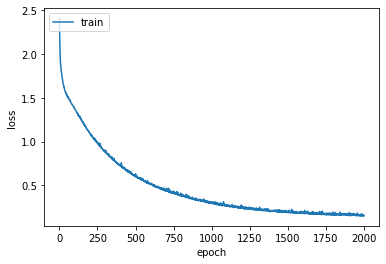

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [33]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.9200
accuracy: 92.00%


In [35]:
pred_count = 50
seq_out = ['g8', 'e8', 'e4', 'f8']

In [40]:
pred_out = model.predict(x_train)
pred_out.shape

(50, 12)

In [42]:
seg_out = []
for i in range(pred_count):
    idx = np.argmax(pred_out[i])
    seg_out.append(idx2code[idx])

In [43]:
seg_out

['d8',
 'd4',
 'c8',
 'e8',
 'e8',
 'f8',
 'g8',
 'g8',
 'g4',
 'g8',
 'e8',
 'e8',
 'e8',
 'f8',
 'g4',
 'd4',
 'c8',
 'e8',
 'g8',
 'g8',
 'e8',
 'e8',
 'e4',
 'd8',
 'd8',
 'd8',
 'd8',
 'd8',
 'd8',
 'f4',
 'e8',
 'e8',
 'e8',
 'e8',
 'e8',
 'e8',
 'g4',
 'g8',
 'e8',
 'e4',
 'f8',
 'd8',
 'd4',
 'c8',
 'e8',
 'g8',
 'g8',
 'e8',
 'e8',
 'e4']

In [44]:
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

In [49]:
# code -> index -> normalization
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in]

In [50]:
for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)
# 결론: 신경망은 시계열 데이터에 대한 예측 모델에 적합하지 않다.

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [ ]:
# 인공신경망 -> LSTM 

In [51]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [52]:
# 1. 데이터 준비하기
        
# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [54]:
# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is", one_hot_vec_size)

(50, 5)
one hot encoding vector size is 12


In [55]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [56]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

In [57]:
# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

Epoch 1/2000
4/4 - 0s - loss: 2.5016 - accuracy: 0.0600
Epoch 2/2000
4/4 - 0s - loss: 2.4528 - accuracy: 0.2200
Epoch 3/2000
4/4 - 0s - loss: 2.4130 - accuracy: 0.3400
Epoch 4/2000
4/4 - 0s - loss: 2.3718 - accuracy: 0.3400
Epoch 5/2000
4/4 - 0s - loss: 2.3204 - accuracy: 0.3400
Epoch 6/2000
4/4 - 0s - loss: 2.2644 - accuracy: 0.3400
Epoch 7/2000
4/4 - 0s - loss: 2.2045 - accuracy: 0.3400
Epoch 8/2000
4/4 - 0s - loss: 2.1207 - accuracy: 0.3400
Epoch 9/2000
4/4 - 0s - loss: 2.0445 - accuracy: 0.3400
Epoch 10/2000
4/4 - 0s - loss: 1.9948 - accuracy: 0.3400
Epoch 11/2000
4/4 - 0s - loss: 1.9853 - accuracy: 0.3400
Epoch 12/2000
4/4 - 0s - loss: 1.9670 - accuracy: 0.3400
Epoch 13/2000
4/4 - 0s - loss: 1.9450 - accuracy: 0.3400
Epoch 14/2000
4/4 - 0s - loss: 1.9326 - accuracy: 0.3400
Epoch 15/2000
4/4 - 0s - loss: 1.9257 - accuracy: 0.3400
Epoch 16/2000
4/4 - 0s - loss: 1.9291 - accuracy: 0.3400
Epoch 17/2000
4/4 - 0s - loss: 1.9219 - accuracy: 0.3400
Epoch 18/2000
4/4 - 0s - loss: 1.9159 - 

Epoch 145/2000
4/4 - 0s - loss: 1.6213 - accuracy: 0.4400
Epoch 146/2000
4/4 - 0s - loss: 1.6172 - accuracy: 0.4400
Epoch 147/2000
4/4 - 0s - loss: 1.6135 - accuracy: 0.4600
Epoch 148/2000
4/4 - 0s - loss: 1.6102 - accuracy: 0.4400
Epoch 149/2000
4/4 - 0s - loss: 1.6054 - accuracy: 0.4600
Epoch 150/2000
4/4 - 0s - loss: 1.5947 - accuracy: 0.4600
Epoch 151/2000
4/4 - 0s - loss: 1.6140 - accuracy: 0.4000
Epoch 152/2000
4/4 - 0s - loss: 1.5970 - accuracy: 0.4200
Epoch 153/2000
4/4 - 0s - loss: 1.5989 - accuracy: 0.4400
Epoch 154/2000
4/4 - 0s - loss: 1.5941 - accuracy: 0.4400
Epoch 155/2000
4/4 - 0s - loss: 1.5956 - accuracy: 0.4600
Epoch 156/2000
4/4 - 0s - loss: 1.6015 - accuracy: 0.4600
Epoch 157/2000
4/4 - 0s - loss: 1.5891 - accuracy: 0.4200
Epoch 158/2000
4/4 - 0s - loss: 1.5835 - accuracy: 0.3800
Epoch 159/2000
4/4 - 0s - loss: 1.5889 - accuracy: 0.4400
Epoch 160/2000
4/4 - 0s - loss: 1.5821 - accuracy: 0.4400
Epoch 161/2000
4/4 - 0s - loss: 1.5709 - accuracy: 0.4600
Epoch 162/2000

Epoch 287/2000
4/4 - 0s - loss: 1.3006 - accuracy: 0.5400
Epoch 288/2000
4/4 - 0s - loss: 1.3023 - accuracy: 0.5200
Epoch 289/2000
4/4 - 0s - loss: 1.2851 - accuracy: 0.5400
Epoch 290/2000
4/4 - 0s - loss: 1.2909 - accuracy: 0.5600
Epoch 291/2000
4/4 - 0s - loss: 1.3038 - accuracy: 0.5600
Epoch 292/2000
4/4 - 0s - loss: 1.3152 - accuracy: 0.5000
Epoch 293/2000
4/4 - 0s - loss: 1.3015 - accuracy: 0.5000
Epoch 294/2000
4/4 - 0s - loss: 1.2844 - accuracy: 0.5400
Epoch 295/2000
4/4 - 0s - loss: 1.2840 - accuracy: 0.5400
Epoch 296/2000
4/4 - 0s - loss: 1.2838 - accuracy: 0.5200
Epoch 297/2000
4/4 - 0s - loss: 1.2866 - accuracy: 0.5200
Epoch 298/2000
4/4 - 0s - loss: 1.2773 - accuracy: 0.5200
Epoch 299/2000
4/4 - 0s - loss: 1.2845 - accuracy: 0.5000
Epoch 300/2000
4/4 - 0s - loss: 1.2878 - accuracy: 0.5400
Epoch 301/2000
4/4 - 0s - loss: 1.2696 - accuracy: 0.5400
Epoch 302/2000
4/4 - 0s - loss: 1.2617 - accuracy: 0.5200
Epoch 303/2000
4/4 - 0s - loss: 1.2900 - accuracy: 0.5000
Epoch 304/2000

Epoch 429/2000
4/4 - 0s - loss: 1.0631 - accuracy: 0.5800
Epoch 430/2000
4/4 - 0s - loss: 1.0605 - accuracy: 0.6000
Epoch 431/2000
4/4 - 0s - loss: 1.0308 - accuracy: 0.6000
Epoch 432/2000
4/4 - 0s - loss: 1.0256 - accuracy: 0.6000
Epoch 433/2000
4/4 - 0s - loss: 1.0238 - accuracy: 0.6200
Epoch 434/2000
4/4 - 0s - loss: 1.0169 - accuracy: 0.5800
Epoch 435/2000
4/4 - 0s - loss: 1.0153 - accuracy: 0.6000
Epoch 436/2000
4/4 - 0s - loss: 1.0136 - accuracy: 0.5800
Epoch 437/2000
4/4 - 0s - loss: 1.0241 - accuracy: 0.6000
Epoch 438/2000
4/4 - 0s - loss: 1.0233 - accuracy: 0.6200
Epoch 439/2000
4/4 - 0s - loss: 1.0544 - accuracy: 0.5800
Epoch 440/2000
4/4 - 0s - loss: 1.0061 - accuracy: 0.6000
Epoch 441/2000
4/4 - 0s - loss: 1.0093 - accuracy: 0.6400
Epoch 442/2000
4/4 - 0s - loss: 0.9963 - accuracy: 0.6200
Epoch 443/2000
4/4 - 0s - loss: 1.0085 - accuracy: 0.6000
Epoch 444/2000
4/4 - 0s - loss: 1.0046 - accuracy: 0.6400
Epoch 445/2000
4/4 - 0s - loss: 0.9996 - accuracy: 0.6200
Epoch 446/2000

Epoch 571/2000
4/4 - 0s - loss: 0.7518 - accuracy: 0.7200
Epoch 572/2000
4/4 - 0s - loss: 0.7491 - accuracy: 0.7200
Epoch 573/2000
4/4 - 0s - loss: 0.7515 - accuracy: 0.7000
Epoch 574/2000
4/4 - 0s - loss: 0.7466 - accuracy: 0.7200
Epoch 575/2000
4/4 - 0s - loss: 0.7420 - accuracy: 0.7200
Epoch 576/2000
4/4 - 0s - loss: 0.7560 - accuracy: 0.6400
Epoch 577/2000
4/4 - 0s - loss: 0.7299 - accuracy: 0.6800
Epoch 578/2000
4/4 - 0s - loss: 0.7717 - accuracy: 0.6600
Epoch 579/2000
4/4 - 0s - loss: 0.7410 - accuracy: 0.6600
Epoch 580/2000
4/4 - 0s - loss: 0.7369 - accuracy: 0.6800
Epoch 581/2000
4/4 - 0s - loss: 0.7591 - accuracy: 0.7000
Epoch 582/2000
4/4 - 0s - loss: 0.7448 - accuracy: 0.7800
Epoch 583/2000
4/4 - 0s - loss: 0.7349 - accuracy: 0.7000
Epoch 584/2000
4/4 - 0s - loss: 0.7304 - accuracy: 0.7000
Epoch 585/2000
4/4 - 0s - loss: 0.7383 - accuracy: 0.7000
Epoch 586/2000
4/4 - 0s - loss: 0.7449 - accuracy: 0.7000
Epoch 587/2000
4/4 - 0s - loss: 0.7139 - accuracy: 0.6800
Epoch 588/2000

Epoch 713/2000
4/4 - 0s - loss: 0.5880 - accuracy: 0.8000
Epoch 714/2000
4/4 - 0s - loss: 0.5849 - accuracy: 0.8000
Epoch 715/2000
4/4 - 0s - loss: 0.6279 - accuracy: 0.8000
Epoch 716/2000
4/4 - 0s - loss: 0.5814 - accuracy: 0.8200
Epoch 717/2000
4/4 - 0s - loss: 0.5947 - accuracy: 0.7600
Epoch 718/2000
4/4 - 0s - loss: 0.5864 - accuracy: 0.7600
Epoch 719/2000
4/4 - 0s - loss: 0.5787 - accuracy: 0.7800
Epoch 720/2000
4/4 - 0s - loss: 0.5887 - accuracy: 0.7600
Epoch 721/2000
4/4 - 0s - loss: 0.5933 - accuracy: 0.8200
Epoch 722/2000
4/4 - 0s - loss: 0.5766 - accuracy: 0.8000
Epoch 723/2000
4/4 - 0s - loss: 0.5808 - accuracy: 0.8200
Epoch 724/2000
4/4 - 0s - loss: 0.5726 - accuracy: 0.8400
Epoch 725/2000
4/4 - 0s - loss: 0.6533 - accuracy: 0.7600
Epoch 726/2000
4/4 - 0s - loss: 0.6413 - accuracy: 0.7800
Epoch 727/2000
4/4 - 0s - loss: 0.6107 - accuracy: 0.7600
Epoch 728/2000
4/4 - 0s - loss: 0.5871 - accuracy: 0.8000
Epoch 729/2000
4/4 - 0s - loss: 0.5926 - accuracy: 0.8200
Epoch 730/2000

Epoch 855/2000
4/4 - 0s - loss: 0.4899 - accuracy: 0.8400
Epoch 856/2000
4/4 - 0s - loss: 0.5230 - accuracy: 0.7600
Epoch 857/2000
4/4 - 0s - loss: 0.4807 - accuracy: 0.8200
Epoch 858/2000
4/4 - 0s - loss: 0.5129 - accuracy: 0.8000
Epoch 859/2000
4/4 - 0s - loss: 0.4887 - accuracy: 0.8400
Epoch 860/2000
4/4 - 0s - loss: 0.5019 - accuracy: 0.8200
Epoch 861/2000
4/4 - 0s - loss: 0.4907 - accuracy: 0.8800
Epoch 862/2000
4/4 - 0s - loss: 0.4935 - accuracy: 0.8200
Epoch 863/2000
4/4 - 0s - loss: 0.4951 - accuracy: 0.8200
Epoch 864/2000
4/4 - 0s - loss: 0.4715 - accuracy: 0.8600
Epoch 865/2000
4/4 - 0s - loss: 0.5007 - accuracy: 0.8200
Epoch 866/2000
4/4 - 0s - loss: 0.4960 - accuracy: 0.8200
Epoch 867/2000
4/4 - 0s - loss: 0.4918 - accuracy: 0.8600
Epoch 868/2000
4/4 - 0s - loss: 0.4831 - accuracy: 0.8200
Epoch 869/2000
4/4 - 0s - loss: 0.4880 - accuracy: 0.8400
Epoch 870/2000
4/4 - 0s - loss: 0.4740 - accuracy: 0.8600
Epoch 871/2000
4/4 - 0s - loss: 0.4874 - accuracy: 0.8600
Epoch 872/2000

Epoch 997/2000
4/4 - 0s - loss: 0.4374 - accuracy: 0.8400
Epoch 998/2000
4/4 - 0s - loss: 0.4420 - accuracy: 0.8600
Epoch 999/2000
4/4 - 0s - loss: 0.4438 - accuracy: 0.8600
Epoch 1000/2000
4/4 - 0s - loss: 0.4447 - accuracy: 0.8600
Epoch 1001/2000
4/4 - 0s - loss: 0.4285 - accuracy: 0.8800
Epoch 1002/2000
4/4 - 0s - loss: 0.4447 - accuracy: 0.8200
Epoch 1003/2000
4/4 - 0s - loss: 0.4249 - accuracy: 0.8600
Epoch 1004/2000
4/4 - 0s - loss: 0.4390 - accuracy: 0.8600
Epoch 1005/2000
4/4 - 0s - loss: 0.4456 - accuracy: 0.8600
Epoch 1006/2000
4/4 - 0s - loss: 0.4510 - accuracy: 0.8400
Epoch 1007/2000
4/4 - 0s - loss: 0.4603 - accuracy: 0.7800
Epoch 1008/2000
4/4 - 0s - loss: 0.4594 - accuracy: 0.8200
Epoch 1009/2000
4/4 - 0s - loss: 0.4727 - accuracy: 0.8000
Epoch 1010/2000
4/4 - 0s - loss: 0.4726 - accuracy: 0.8000
Epoch 1011/2000
4/4 - 0s - loss: 0.4644 - accuracy: 0.7800
Epoch 1012/2000
4/4 - 0s - loss: 0.4719 - accuracy: 0.7600
Epoch 1013/2000
4/4 - 0s - loss: 0.4348 - accuracy: 0.8600


Epoch 1136/2000
4/4 - 0s - loss: 0.4015 - accuracy: 0.8600
Epoch 1137/2000
4/4 - 0s - loss: 0.3937 - accuracy: 0.8400
Epoch 1138/2000
4/4 - 0s - loss: 0.3958 - accuracy: 0.8600
Epoch 1139/2000
4/4 - 0s - loss: 0.3983 - accuracy: 0.8600
Epoch 1140/2000
4/4 - 0s - loss: 0.4278 - accuracy: 0.8600
Epoch 1141/2000
4/4 - 0s - loss: 0.3960 - accuracy: 0.8600
Epoch 1142/2000
4/4 - 0s - loss: 0.3978 - accuracy: 0.8400
Epoch 1143/2000
4/4 - 0s - loss: 0.3808 - accuracy: 0.8600
Epoch 1144/2000
4/4 - 0s - loss: 0.3977 - accuracy: 0.8600
Epoch 1145/2000
4/4 - 0s - loss: 0.4188 - accuracy: 0.8400
Epoch 1146/2000
4/4 - 0s - loss: 0.4498 - accuracy: 0.8600
Epoch 1147/2000
4/4 - 0s - loss: 0.4107 - accuracy: 0.8600
Epoch 1148/2000
4/4 - 0s - loss: 0.4140 - accuracy: 0.8400
Epoch 1149/2000
4/4 - 0s - loss: 0.4400 - accuracy: 0.8200
Epoch 1150/2000
4/4 - 0s - loss: 0.4201 - accuracy: 0.8600
Epoch 1151/2000
4/4 - 0s - loss: 0.4064 - accuracy: 0.8600
Epoch 1152/2000
4/4 - 0s - loss: 0.3990 - accuracy: 0.86

Epoch 1275/2000
4/4 - 0s - loss: 0.3777 - accuracy: 0.8600
Epoch 1276/2000
4/4 - 0s - loss: 0.3576 - accuracy: 0.8600
Epoch 1277/2000
4/4 - 0s - loss: 0.3692 - accuracy: 0.8600
Epoch 1278/2000
4/4 - 0s - loss: 0.3622 - accuracy: 0.8600
Epoch 1279/2000
4/4 - 0s - loss: 0.3640 - accuracy: 0.8800
Epoch 1280/2000
4/4 - 0s - loss: 0.3652 - accuracy: 0.8600
Epoch 1281/2000
4/4 - 0s - loss: 0.3664 - accuracy: 0.8800
Epoch 1282/2000
4/4 - 0s - loss: 0.3654 - accuracy: 0.8600
Epoch 1283/2000
4/4 - 0s - loss: 0.3663 - accuracy: 0.8600
Epoch 1284/2000
4/4 - 0s - loss: 0.3949 - accuracy: 0.8200
Epoch 1285/2000
4/4 - 0s - loss: 0.3602 - accuracy: 0.8400
Epoch 1286/2000
4/4 - 0s - loss: 0.3626 - accuracy: 0.8400
Epoch 1287/2000
4/4 - 0s - loss: 0.3741 - accuracy: 0.8400
Epoch 1288/2000
4/4 - 0s - loss: 0.3788 - accuracy: 0.8400
Epoch 1289/2000
4/4 - 0s - loss: 0.3658 - accuracy: 0.8400
Epoch 1290/2000
4/4 - 0s - loss: 0.4039 - accuracy: 0.8600
Epoch 1291/2000
4/4 - 0s - loss: 0.3598 - accuracy: 0.88

Epoch 1414/2000
4/4 - 0s - loss: 0.3705 - accuracy: 0.8800
Epoch 1415/2000
4/4 - 0s - loss: 0.3430 - accuracy: 0.8600
Epoch 1416/2000
4/4 - 0s - loss: 0.3460 - accuracy: 0.8600
Epoch 1417/2000
4/4 - 0s - loss: 0.3408 - accuracy: 0.8600
Epoch 1418/2000
4/4 - 0s - loss: 0.3328 - accuracy: 0.8600
Epoch 1419/2000
4/4 - 0s - loss: 0.3532 - accuracy: 0.8600
Epoch 1420/2000
4/4 - 0s - loss: 0.3493 - accuracy: 0.8400
Epoch 1421/2000
4/4 - 0s - loss: 0.3548 - accuracy: 0.8600
Epoch 1422/2000
4/4 - 0s - loss: 0.3457 - accuracy: 0.8800
Epoch 1423/2000
4/4 - 0s - loss: 0.3785 - accuracy: 0.8400
Epoch 1424/2000
4/4 - 0s - loss: 0.3502 - accuracy: 0.8800
Epoch 1425/2000
4/4 - 0s - loss: 0.3447 - accuracy: 0.8800
Epoch 1426/2000
4/4 - 0s - loss: 0.3665 - accuracy: 0.8400
Epoch 1427/2000
4/4 - 0s - loss: 0.3570 - accuracy: 0.8800
Epoch 1428/2000
4/4 - 0s - loss: 0.3360 - accuracy: 0.8600
Epoch 1429/2000
4/4 - 0s - loss: 0.3520 - accuracy: 0.8600
Epoch 1430/2000
4/4 - 0s - loss: 0.3316 - accuracy: 0.88

Epoch 1553/2000
4/4 - 0s - loss: 0.3344 - accuracy: 0.8600
Epoch 1554/2000
4/4 - 0s - loss: 0.3305 - accuracy: 0.8400
Epoch 1555/2000
4/4 - 0s - loss: 0.3266 - accuracy: 0.8800
Epoch 1556/2000
4/4 - 0s - loss: 0.3233 - accuracy: 0.8800
Epoch 1557/2000
4/4 - 0s - loss: 0.3219 - accuracy: 0.8600
Epoch 1558/2000
4/4 - 0s - loss: 0.3130 - accuracy: 0.8600
Epoch 1559/2000
4/4 - 0s - loss: 0.3250 - accuracy: 0.8600
Epoch 1560/2000
4/4 - 0s - loss: 0.3287 - accuracy: 0.8600
Epoch 1561/2000
4/4 - 0s - loss: 0.3368 - accuracy: 0.8600
Epoch 1562/2000
4/4 - 0s - loss: 0.3168 - accuracy: 0.8600
Epoch 1563/2000
4/4 - 0s - loss: 0.3215 - accuracy: 0.8600
Epoch 1564/2000
4/4 - 0s - loss: 0.3323 - accuracy: 0.8800
Epoch 1565/2000
4/4 - 0s - loss: 0.3229 - accuracy: 0.9200
Epoch 1566/2000
4/4 - 0s - loss: 0.3180 - accuracy: 0.9000
Epoch 1567/2000
4/4 - 0s - loss: 0.3304 - accuracy: 0.8800
Epoch 1568/2000
4/4 - 0s - loss: 0.3246 - accuracy: 0.8600
Epoch 1569/2000
4/4 - 0s - loss: 0.3470 - accuracy: 0.84

Epoch 1692/2000
4/4 - 0s - loss: 0.3010 - accuracy: 0.8800
Epoch 1693/2000
4/4 - 0s - loss: 0.3144 - accuracy: 0.8400
Epoch 1694/2000
4/4 - 0s - loss: 0.3052 - accuracy: 0.8400
Epoch 1695/2000
4/4 - 0s - loss: 0.3066 - accuracy: 0.8800
Epoch 1696/2000
4/4 - 0s - loss: 0.3024 - accuracy: 0.8600
Epoch 1697/2000
4/4 - 0s - loss: 0.3069 - accuracy: 0.8800
Epoch 1698/2000
4/4 - 0s - loss: 0.3617 - accuracy: 0.8600
Epoch 1699/2000
4/4 - 0s - loss: 0.3317 - accuracy: 0.8600
Epoch 1700/2000
4/4 - 0s - loss: 0.4490 - accuracy: 0.8200
Epoch 1701/2000
4/4 - 0s - loss: 0.4727 - accuracy: 0.7400
Epoch 1702/2000
4/4 - 0s - loss: 0.4461 - accuracy: 0.7800
Epoch 1703/2000
4/4 - 0s - loss: 0.3776 - accuracy: 0.8000
Epoch 1704/2000
4/4 - 0s - loss: 0.3971 - accuracy: 0.7800
Epoch 1705/2000
4/4 - 0s - loss: 0.3165 - accuracy: 0.8400
Epoch 1706/2000
4/4 - 0s - loss: 0.3478 - accuracy: 0.8600
Epoch 1707/2000
4/4 - 0s - loss: 0.3201 - accuracy: 0.8600
Epoch 1708/2000
4/4 - 0s - loss: 0.3096 - accuracy: 0.84

Epoch 1831/2000
4/4 - 0s - loss: 0.2924 - accuracy: 0.9000
Epoch 1832/2000
4/4 - 0s - loss: 0.2933 - accuracy: 0.9000
Epoch 1833/2000
4/4 - 0s - loss: 0.2945 - accuracy: 0.8800
Epoch 1834/2000
4/4 - 0s - loss: 0.2900 - accuracy: 0.8800
Epoch 1835/2000
4/4 - 0s - loss: 0.2982 - accuracy: 0.8600
Epoch 1836/2000
4/4 - 0s - loss: 0.2935 - accuracy: 0.8600
Epoch 1837/2000
4/4 - 0s - loss: 0.2926 - accuracy: 0.9000
Epoch 1838/2000
4/4 - 0s - loss: 0.2940 - accuracy: 0.8800
Epoch 1839/2000
4/4 - 0s - loss: 0.2999 - accuracy: 0.8600
Epoch 1840/2000
4/4 - 0s - loss: 0.2946 - accuracy: 0.8600
Epoch 1841/2000
4/4 - 0s - loss: 0.3118 - accuracy: 0.8800
Epoch 1842/2000
4/4 - 0s - loss: 0.2914 - accuracy: 0.9000
Epoch 1843/2000
4/4 - 0s - loss: 0.2999 - accuracy: 0.9000
Epoch 1844/2000
4/4 - 0s - loss: 0.2865 - accuracy: 0.9000
Epoch 1845/2000
4/4 - 0s - loss: 0.3405 - accuracy: 0.8800
Epoch 1846/2000
4/4 - 0s - loss: 0.3017 - accuracy: 0.9000
Epoch 1847/2000
4/4 - 0s - loss: 0.2926 - accuracy: 0.90

Epoch 1970/2000
4/4 - 0s - loss: 0.2852 - accuracy: 0.9000
Epoch 1971/2000
4/4 - 0s - loss: 0.2910 - accuracy: 0.8600
Epoch 1972/2000
4/4 - 0s - loss: 0.2898 - accuracy: 0.8600
Epoch 1973/2000
4/4 - 0s - loss: 0.2873 - accuracy: 0.8800
Epoch 1974/2000
4/4 - 0s - loss: 0.2841 - accuracy: 0.9000
Epoch 1975/2000
4/4 - 0s - loss: 0.2943 - accuracy: 0.8600
Epoch 1976/2000
4/4 - 0s - loss: 0.2877 - accuracy: 0.8800
Epoch 1977/2000
4/4 - 0s - loss: 0.3117 - accuracy: 0.8800
Epoch 1978/2000
4/4 - 0s - loss: 0.3102 - accuracy: 0.8600
Epoch 1979/2000
4/4 - 0s - loss: 0.2970 - accuracy: 0.8800
Epoch 1980/2000
4/4 - 0s - loss: 0.2947 - accuracy: 0.8600
Epoch 1981/2000
4/4 - 0s - loss: 0.2827 - accuracy: 0.8800
Epoch 1982/2000
4/4 - 0s - loss: 0.2881 - accuracy: 0.9000
Epoch 1983/2000
4/4 - 0s - loss: 0.2816 - accuracy: 0.8800
Epoch 1984/2000
4/4 - 0s - loss: 0.2868 - accuracy: 0.8800
Epoch 1985/2000
4/4 - 0s - loss: 0.2901 - accuracy: 0.8800
Epoch 1986/2000
4/4 - 0s - loss: 0.2830 - accuracy: 0.88

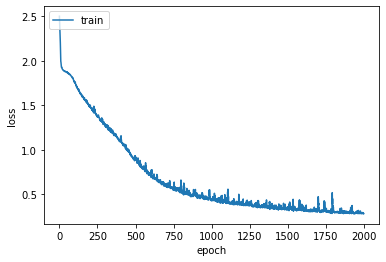

2/2 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.9000
accuracy: 90.00%


In [58]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


In [59]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)


one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [60]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']


In [61]:
# stageful = True 설정하면 성능이 좋아질까?
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 2000

history = LossHistory()

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states() # 모델에 있는 모든 상태값을 초기화

epochs : 0
50/50 - 0s - loss: 2.3315 - accuracy: 0.1400
epochs : 1
50/50 - 0s - loss: 1.9989 - accuracy: 0.3400
epochs : 2
50/50 - 0s - loss: 1.9574 - accuracy: 0.3400
epochs : 3
50/50 - 0s - loss: 1.9431 - accuracy: 0.3400
epochs : 4
50/50 - 0s - loss: 1.9338 - accuracy: 0.3400
epochs : 5
50/50 - 0s - loss: 1.9270 - accuracy: 0.3400
epochs : 6
50/50 - 0s - loss: 1.9216 - accuracy: 0.3400
epochs : 7
50/50 - 0s - loss: 1.9172 - accuracy: 0.3400
epochs : 8
50/50 - 0s - loss: 1.9132 - accuracy: 0.3400
epochs : 9
50/50 - 0s - loss: 1.9095 - accuracy: 0.3600
epochs : 10
50/50 - 0s - loss: 1.9057 - accuracy: 0.3600
epochs : 11
50/50 - 0s - loss: 1.9016 - accuracy: 0.3600
epochs : 12
50/50 - 0s - loss: 1.8966 - accuracy: 0.3600
epochs : 13
50/50 - 0s - loss: 1.8927 - accuracy: 0.3600
epochs : 14
50/50 - 0s - loss: 1.9555 - accuracy: 0.3400
epochs : 15
50/50 - 0s - loss: 1.9083 - accuracy: 0.3400
epochs : 16
50/50 - 0s - loss: 1.9010 - accuracy: 0.3600
epochs : 17
50/50 - 0s - loss: 1.8972 - a

50/50 - 0s - loss: 0.6522 - accuracy: 0.7600
epochs : 144
50/50 - 0s - loss: 0.6465 - accuracy: 0.7400
epochs : 145
50/50 - 0s - loss: 0.8151 - accuracy: 0.7000
epochs : 146
50/50 - 0s - loss: 0.9028 - accuracy: 0.7200
epochs : 147
50/50 - 0s - loss: 1.0948 - accuracy: 0.5600
epochs : 148
50/50 - 0s - loss: 0.6574 - accuracy: 0.7400
epochs : 149
50/50 - 0s - loss: 0.6075 - accuracy: 0.7600
epochs : 150
50/50 - 0s - loss: 0.7780 - accuracy: 0.6800
epochs : 151
50/50 - 0s - loss: 1.2363 - accuracy: 0.5200
epochs : 152
50/50 - 0s - loss: 0.6569 - accuracy: 0.7800
epochs : 153
50/50 - 0s - loss: 0.5283 - accuracy: 0.8600
epochs : 154
50/50 - 0s - loss: 0.5129 - accuracy: 0.8000
epochs : 155
50/50 - 0s - loss: 0.6088 - accuracy: 0.7400
epochs : 156
50/50 - 0s - loss: 0.4280 - accuracy: 0.8600
epochs : 157
50/50 - 0s - loss: 0.4993 - accuracy: 0.8800
epochs : 158
50/50 - 0s - loss: 0.4895 - accuracy: 0.8000
epochs : 159
50/50 - 0s - loss: 0.7936 - accuracy: 0.6600
epochs : 160
50/50 - 0s - l

epochs : 285
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 286
50/50 - 0s - loss: 0.0018 - accuracy: 1.0000
epochs : 287
50/50 - 0s - loss: 0.0018 - accuracy: 1.0000
epochs : 288
50/50 - 0s - loss: 0.0017 - accuracy: 1.0000
epochs : 289
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 290
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 291
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 292
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 293
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 294
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 295
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 296
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 297
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 298
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 299
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 300
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 301
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 302
5

epochs : 419
50/50 - 0s - loss: 3.3316e-05 - accuracy: 1.0000
epochs : 420
50/50 - 0s - loss: 3.2467e-05 - accuracy: 1.0000
epochs : 421
50/50 - 0s - loss: 3.1626e-05 - accuracy: 1.0000
epochs : 422
50/50 - 0s - loss: 3.0772e-05 - accuracy: 1.0000
epochs : 423
50/50 - 0s - loss: 2.9947e-05 - accuracy: 1.0000
epochs : 424
50/50 - 0s - loss: 2.9144e-05 - accuracy: 1.0000
epochs : 425
50/50 - 0s - loss: 2.8355e-05 - accuracy: 1.0000
epochs : 426
50/50 - 0s - loss: 2.7601e-05 - accuracy: 1.0000
epochs : 427
50/50 - 0s - loss: 2.6874e-05 - accuracy: 1.0000
epochs : 428
50/50 - 0s - loss: 2.6144e-05 - accuracy: 1.0000
epochs : 429
50/50 - 0s - loss: 2.5413e-05 - accuracy: 1.0000
epochs : 430
50/50 - 0s - loss: 2.4704e-05 - accuracy: 1.0000
epochs : 431
50/50 - 0s - loss: 2.3992e-05 - accuracy: 1.0000
epochs : 432
50/50 - 0s - loss: 2.3310e-05 - accuracy: 1.0000
epochs : 433
50/50 - 0s - loss: 2.2647e-05 - accuracy: 1.0000
epochs : 434
50/50 - 0s - loss: 2.1989e-05 - accuracy: 1.0000
epochs :

epochs : 558
50/50 - 0s - loss: 0.0284 - accuracy: 1.0000
epochs : 559
50/50 - 0s - loss: 0.0258 - accuracy: 1.0000
epochs : 560
50/50 - 0s - loss: 0.0191 - accuracy: 1.0000
epochs : 561
50/50 - 0s - loss: 0.0171 - accuracy: 1.0000
epochs : 562
50/50 - 0s - loss: 0.0158 - accuracy: 1.0000
epochs : 563
50/50 - 0s - loss: 0.0149 - accuracy: 1.0000
epochs : 564
50/50 - 0s - loss: 0.0143 - accuracy: 1.0000
epochs : 565
50/50 - 0s - loss: 0.0136 - accuracy: 1.0000
epochs : 566
50/50 - 0s - loss: 0.0123 - accuracy: 1.0000
epochs : 567
50/50 - 0s - loss: 0.0111 - accuracy: 1.0000
epochs : 568
50/50 - 0s - loss: 0.0103 - accuracy: 1.0000
epochs : 569
50/50 - 0s - loss: 0.0099 - accuracy: 1.0000
epochs : 570
50/50 - 0s - loss: 0.0096 - accuracy: 1.0000
epochs : 571
50/50 - 0s - loss: 0.0093 - accuracy: 1.0000
epochs : 572
50/50 - 0s - loss: 0.0089 - accuracy: 1.0000
epochs : 573
50/50 - 0s - loss: 0.0084 - accuracy: 1.0000
epochs : 574
50/50 - 0s - loss: 0.0079 - accuracy: 1.0000
epochs : 575
5

epochs : 695
50/50 - 0s - loss: 0.8414 - accuracy: 0.6800
epochs : 696
50/50 - 0s - loss: 0.7347 - accuracy: 0.7400
epochs : 697
50/50 - 0s - loss: 0.5886 - accuracy: 0.7200
epochs : 698
50/50 - 0s - loss: 0.5447 - accuracy: 0.8200
epochs : 699
50/50 - 0s - loss: 0.6802 - accuracy: 0.7800
epochs : 700
50/50 - 0s - loss: 0.9246 - accuracy: 0.5400
epochs : 701
50/50 - 0s - loss: 0.5835 - accuracy: 0.8000
epochs : 702
50/50 - 0s - loss: 0.3819 - accuracy: 0.8600
epochs : 703
50/50 - 0s - loss: 0.2148 - accuracy: 0.9800
epochs : 704
50/50 - 0s - loss: 0.3839 - accuracy: 0.8800
epochs : 705
50/50 - 0s - loss: 0.6654 - accuracy: 0.7800
epochs : 706
50/50 - 0s - loss: 0.9425 - accuracy: 0.6200
epochs : 707
50/50 - 0s - loss: 0.5995 - accuracy: 0.8000
epochs : 708
50/50 - 0s - loss: 0.5453 - accuracy: 0.8200
epochs : 709
50/50 - 0s - loss: 0.4237 - accuracy: 0.8800
epochs : 710
50/50 - 0s - loss: 0.3745 - accuracy: 0.8600
epochs : 711
50/50 - 0s - loss: 0.1421 - accuracy: 0.9800
epochs : 712
5

50/50 - 0s - loss: 3.2368e-04 - accuracy: 1.0000
epochs : 835
50/50 - 0s - loss: 3.1440e-04 - accuracy: 1.0000
epochs : 836
50/50 - 0s - loss: 3.0760e-04 - accuracy: 1.0000
epochs : 837
50/50 - 0s - loss: 3.0530e-04 - accuracy: 1.0000
epochs : 838
50/50 - 0s - loss: 3.0942e-04 - accuracy: 1.0000
epochs : 839
50/50 - 0s - loss: 3.1502e-04 - accuracy: 1.0000
epochs : 840
50/50 - 0s - loss: 3.1647e-04 - accuracy: 1.0000
epochs : 841
50/50 - 0s - loss: 3.0957e-04 - accuracy: 1.0000
epochs : 842
50/50 - 0s - loss: 2.9441e-04 - accuracy: 1.0000
epochs : 843
50/50 - 0s - loss: 2.7664e-04 - accuracy: 1.0000
epochs : 844
50/50 - 0s - loss: 2.6066e-04 - accuracy: 1.0000
epochs : 845
50/50 - 0s - loss: 2.4786e-04 - accuracy: 1.0000
epochs : 846
50/50 - 0s - loss: 2.3781e-04 - accuracy: 1.0000
epochs : 847
50/50 - 0s - loss: 2.2931e-04 - accuracy: 1.0000
epochs : 848
50/50 - 0s - loss: 2.2165e-04 - accuracy: 1.0000
epochs : 849
50/50 - 0s - loss: 2.1455e-04 - accuracy: 1.0000
epochs : 850
50/50 - 

epochs : 967
50/50 - 0s - loss: 1.1125e-05 - accuracy: 1.0000
epochs : 968
50/50 - 0s - loss: 1.0884e-05 - accuracy: 1.0000
epochs : 969
50/50 - 0s - loss: 1.0819e-05 - accuracy: 1.0000
epochs : 970
50/50 - 0s - loss: 1.0571e-05 - accuracy: 1.0000
epochs : 971
50/50 - 0s - loss: 1.1783e-05 - accuracy: 1.0000
epochs : 972
50/50 - 0s - loss: 1.6043e-05 - accuracy: 1.0000
epochs : 973
50/50 - 0s - loss: 0.0508 - accuracy: 0.9800
epochs : 974
50/50 - 0s - loss: 3.3725 - accuracy: 0.3400
epochs : 975
50/50 - 0s - loss: 2.3089 - accuracy: 0.2800
epochs : 976
50/50 - 0s - loss: 1.9068 - accuracy: 0.3200
epochs : 977
50/50 - 0s - loss: 1.5911 - accuracy: 0.3200
epochs : 978
50/50 - 0s - loss: 1.5666 - accuracy: 0.4200
epochs : 979
50/50 - 0s - loss: 1.4026 - accuracy: 0.4200
epochs : 980
50/50 - 0s - loss: 1.2940 - accuracy: 0.4400
epochs : 981
50/50 - 0s - loss: 1.2979 - accuracy: 0.3800
epochs : 982
50/50 - 0s - loss: 1.2431 - accuracy: 0.4200
epochs : 983
50/50 - 0s - loss: 1.2129 - accurac

50/50 - 0s - loss: 0.0032 - accuracy: 1.0000
epochs : 1107
50/50 - 0s - loss: 0.0031 - accuracy: 1.0000
epochs : 1108
50/50 - 0s - loss: 0.0031 - accuracy: 1.0000
epochs : 1109
50/50 - 0s - loss: 0.0030 - accuracy: 1.0000
epochs : 1110
50/50 - 0s - loss: 0.0028 - accuracy: 1.0000
epochs : 1111
50/50 - 0s - loss: 0.0027 - accuracy: 1.0000
epochs : 1112
50/50 - 0s - loss: 0.0026 - accuracy: 1.0000
epochs : 1113
50/50 - 0s - loss: 0.0025 - accuracy: 1.0000
epochs : 1114
50/50 - 0s - loss: 0.0025 - accuracy: 1.0000
epochs : 1115
50/50 - 0s - loss: 0.0024 - accuracy: 1.0000
epochs : 1116
50/50 - 0s - loss: 0.0023 - accuracy: 1.0000
epochs : 1117
50/50 - 0s - loss: 0.0022 - accuracy: 1.0000
epochs : 1118
50/50 - 0s - loss: 0.0021 - accuracy: 1.0000
epochs : 1119
50/50 - 0s - loss: 0.0020 - accuracy: 1.0000
epochs : 1120
50/50 - 0s - loss: 0.0020 - accuracy: 1.0000
epochs : 1121
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 1122
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 11

epochs : 1239
50/50 - 0s - loss: 5.3904e-05 - accuracy: 1.0000
epochs : 1240
50/50 - 0s - loss: 5.2410e-05 - accuracy: 1.0000
epochs : 1241
50/50 - 0s - loss: 5.0905e-05 - accuracy: 1.0000
epochs : 1242
50/50 - 0s - loss: 4.9477e-05 - accuracy: 1.0000
epochs : 1243
50/50 - 0s - loss: 4.8061e-05 - accuracy: 1.0000
epochs : 1244
50/50 - 0s - loss: 4.6671e-05 - accuracy: 1.0000
epochs : 1245
50/50 - 0s - loss: 4.5303e-05 - accuracy: 1.0000
epochs : 1246
50/50 - 0s - loss: 4.3996e-05 - accuracy: 1.0000
epochs : 1247
50/50 - 0s - loss: 4.2707e-05 - accuracy: 1.0000
epochs : 1248
50/50 - 0s - loss: 4.1484e-05 - accuracy: 1.0000
epochs : 1249
50/50 - 0s - loss: 4.0282e-05 - accuracy: 1.0000
epochs : 1250
50/50 - 0s - loss: 3.9133e-05 - accuracy: 1.0000
epochs : 1251
50/50 - 0s - loss: 3.8036e-05 - accuracy: 1.0000
epochs : 1252
50/50 - 0s - loss: 3.6963e-05 - accuracy: 1.0000
epochs : 1253
50/50 - 0s - loss: 3.5962e-05 - accuracy: 1.0000
epochs : 1254
50/50 - 0s - loss: 3.4982e-05 - accuracy:

epochs : 1372
50/50 - 0s - loss: 0.4063 - accuracy: 0.8600
epochs : 1373
50/50 - 0s - loss: 0.3841 - accuracy: 0.8600
epochs : 1374
50/50 - 0s - loss: 0.7680 - accuracy: 0.7800
epochs : 1375
50/50 - 0s - loss: 0.6091 - accuracy: 0.7200
epochs : 1376
50/50 - 0s - loss: 0.3575 - accuracy: 0.8600
epochs : 1377
50/50 - 0s - loss: 0.2325 - accuracy: 0.9200
epochs : 1378
50/50 - 0s - loss: 0.1105 - accuracy: 0.9800
epochs : 1379
50/50 - 0s - loss: 0.0720 - accuracy: 1.0000
epochs : 1380
50/50 - 0s - loss: 0.0486 - accuracy: 1.0000
epochs : 1381
50/50 - 0s - loss: 0.0379 - accuracy: 1.0000
epochs : 1382
50/50 - 0s - loss: 0.0302 - accuracy: 1.0000
epochs : 1383
50/50 - 0s - loss: 0.0245 - accuracy: 1.0000
epochs : 1384
50/50 - 0s - loss: 0.0205 - accuracy: 1.0000
epochs : 1385
50/50 - 0s - loss: 0.0195 - accuracy: 1.0000
epochs : 1386
50/50 - 0s - loss: 0.0185 - accuracy: 1.0000
epochs : 1387
50/50 - 0s - loss: 0.0172 - accuracy: 1.0000
epochs : 1388
50/50 - 0s - loss: 0.0171 - accuracy: 1.00

epochs : 1508
50/50 - 0s - loss: 2.3782e-04 - accuracy: 1.0000
epochs : 1509
50/50 - 0s - loss: 2.2908e-04 - accuracy: 1.0000
epochs : 1510
50/50 - 0s - loss: 2.2326e-04 - accuracy: 1.0000
epochs : 1511
50/50 - 0s - loss: 2.1497e-04 - accuracy: 1.0000
epochs : 1512
50/50 - 0s - loss: 2.0568e-04 - accuracy: 1.0000
epochs : 1513
50/50 - 0s - loss: 1.9951e-04 - accuracy: 1.0000
epochs : 1514
50/50 - 0s - loss: 1.9715e-04 - accuracy: 1.0000
epochs : 1515
50/50 - 0s - loss: 1.9626e-04 - accuracy: 1.0000
epochs : 1516
50/50 - 0s - loss: 1.9414e-04 - accuracy: 1.0000
epochs : 1517
50/50 - 0s - loss: 1.8949e-04 - accuracy: 1.0000
epochs : 1518
50/50 - 0s - loss: 1.8278e-04 - accuracy: 1.0000
epochs : 1519
50/50 - 0s - loss: 1.7526e-04 - accuracy: 1.0000
epochs : 1520
50/50 - 0s - loss: 1.6769e-04 - accuracy: 1.0000
epochs : 1521
50/50 - 0s - loss: 1.6041e-04 - accuracy: 1.0000
epochs : 1522
50/50 - 0s - loss: 1.5358e-04 - accuracy: 1.0000
epochs : 1523
50/50 - 0s - loss: 1.4733e-04 - accuracy:

50/50 - 0s - loss: 8.6092e-06 - accuracy: 1.0000
epochs : 1639
50/50 - 0s - loss: 8.4233e-06 - accuracy: 1.0000
epochs : 1640
50/50 - 0s - loss: 8.2278e-06 - accuracy: 1.0000
epochs : 1641
50/50 - 0s - loss: 8.0347e-06 - accuracy: 1.0000
epochs : 1642
50/50 - 0s - loss: 7.8415e-06 - accuracy: 1.0000
epochs : 1643
50/50 - 0s - loss: 7.6627e-06 - accuracy: 1.0000
epochs : 1644
50/50 - 0s - loss: 7.4696e-06 - accuracy: 1.0000
epochs : 1645
50/50 - 0s - loss: 7.2836e-06 - accuracy: 1.0000
epochs : 1646
50/50 - 0s - loss: 7.1024e-06 - accuracy: 1.0000
epochs : 1647
50/50 - 0s - loss: 6.9451e-06 - accuracy: 1.0000
epochs : 1648
50/50 - 0s - loss: 6.7806e-06 - accuracy: 1.0000
epochs : 1649
50/50 - 0s - loss: 6.6161e-06 - accuracy: 1.0000
epochs : 1650
50/50 - 0s - loss: 6.4659e-06 - accuracy: 1.0000
epochs : 1651
50/50 - 0s - loss: 6.3157e-06 - accuracy: 1.0000
epochs : 1652
50/50 - 0s - loss: 6.1464e-06 - accuracy: 1.0000
epochs : 1653
50/50 - 0s - loss: 5.9914e-06 - accuracy: 1.0000
epochs

epochs : 1769
50/50 - 0s - loss: 3.0756e-07 - accuracy: 1.0000
epochs : 1770
50/50 - 0s - loss: 3.0041e-07 - accuracy: 1.0000
epochs : 1771
50/50 - 0s - loss: 2.9802e-07 - accuracy: 1.0000
epochs : 1772
50/50 - 0s - loss: 2.8610e-07 - accuracy: 1.0000
epochs : 1773
50/50 - 0s - loss: 2.8372e-07 - accuracy: 1.0000
epochs : 1774
50/50 - 0s - loss: 2.8372e-07 - accuracy: 1.0000
epochs : 1775
50/50 - 0s - loss: 2.7418e-07 - accuracy: 1.0000
epochs : 1776
50/50 - 0s - loss: 2.6464e-07 - accuracy: 1.0000
epochs : 1777
50/50 - 0s - loss: 2.5749e-07 - accuracy: 1.0000
epochs : 1778
50/50 - 0s - loss: 2.4796e-07 - accuracy: 1.0000
epochs : 1779
50/50 - 0s - loss: 2.3842e-07 - accuracy: 1.0000
epochs : 1780
50/50 - 0s - loss: 2.3842e-07 - accuracy: 1.0000
epochs : 1781
50/50 - 0s - loss: 2.2650e-07 - accuracy: 1.0000
epochs : 1782
50/50 - 0s - loss: 2.1696e-07 - accuracy: 1.0000
epochs : 1783
50/50 - 0s - loss: 2.1696e-07 - accuracy: 1.0000
epochs : 1784
50/50 - 0s - loss: 2.0742e-07 - accuracy:

epochs : 1905
50/50 - 0s - loss: 0.2233 - accuracy: 0.9000
epochs : 1906
50/50 - 0s - loss: 0.2097 - accuracy: 0.9400
epochs : 1907
50/50 - 0s - loss: 0.5420 - accuracy: 0.8600
epochs : 1908
50/50 - 0s - loss: 0.6994 - accuracy: 0.7200
epochs : 1909
50/50 - 0s - loss: 0.3558 - accuracy: 0.8600
epochs : 1910
50/50 - 0s - loss: 0.2074 - accuracy: 0.9600
epochs : 1911
50/50 - 0s - loss: 0.0780 - accuracy: 0.9800
epochs : 1912
50/50 - 0s - loss: 0.0379 - accuracy: 1.0000
epochs : 1913
50/50 - 0s - loss: 0.0570 - accuracy: 0.9800
epochs : 1914
50/50 - 0s - loss: 0.0489 - accuracy: 0.9800
epochs : 1915
50/50 - 0s - loss: 0.0869 - accuracy: 0.9600
epochs : 1916
50/50 - 0s - loss: 0.0180 - accuracy: 1.0000
epochs : 1917
50/50 - 0s - loss: 0.0104 - accuracy: 1.0000
epochs : 1918
50/50 - 0s - loss: 0.0096 - accuracy: 1.0000
epochs : 1919
50/50 - 0s - loss: 0.0087 - accuracy: 1.0000
epochs : 1920
50/50 - 0s - loss: 0.0079 - accuracy: 1.0000
epochs : 1921
50/50 - 0s - loss: 0.0071 - accuracy: 1.00

In [62]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [63]:
# seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
#        'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
#        'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
#        'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
# 100% 정답!